In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantbullet.preprocessing.transformers import FlatRampTransformer
from quantbullet.dfutils import get_bins_and_labels

## Single Feature Classification Problem

In [16]:
np.random.seed(42)
n_samples = 1_000_000
x1 = np.random.uniform(0, 4, n_samples)
y = ( x1 - 2 ) ** 2 + np.random.normal(0, 1, n_samples) + 10
df = pd.DataFrame({'x1': x1, 'y': y})

In [17]:
x1_trans = FlatRampTransformer(
    knots = [0.5, 1, 2, 3, 3.5],
    include_bias=True
)

train_df = np.concatenate([
    x1_trans.fit_transform(df['x1']),
], axis=1)

train_df = pd.DataFrame(train_df, columns = x1_trans.get_feature_names_out().tolist() )

In [18]:
x1_bins, x1_labels = get_bins_and_labels(cutoffs=np.arange(0.2, 4, 0.2))
df['x1_bins'] = pd.cut( df['x1'], bins=x1_bins, labels=x1_labels )

In [19]:
feature_groups = {'x1': x1_trans.get_feature_names_out().tolist()}

In [20]:
probs = 1 / (1 + np.exp(-(df['y'] - 16)))
df['binary_y'] = np.random.binomial(1, probs)
print(df['binary_y'].mean())

0.028057


In [21]:
from quantbullet.optimizer import LinearProductClassifierScipy

lpc_scipy = LinearProductClassifierScipy(ftol=1e-6, gtol=1e-6, eps=1e-3)

In [22]:
lpc_scipy.fit( train_df, df['binary_y'], feature_groups=feature_groups )

Using initial params: {'x1': array([0.00086681, 0.00040644, 0.00078578, 0.00140893, 0.002059  ,
       0.00268176, 0.003061  ])}
Iter 1: 120523.82478221123
Iter 2: 120395.16296375271
Iter 3: 120328.06015034951
Iter 4: 119952.0493315392
Iter 5: 118074.92817403704
Iter 6: 117241.50436840078
Iter 7: 116662.01965224145
Iter 8: 116396.75425076533
Iter 9: 116207.79557625332
Iter 10: 116113.04088989305
Iter 11: 116044.2837691156
Iter 12: 116037.0594774396
Iter 13: 115979.9839340113
Iter 14: 115905.92322787624
Iter 15: 115506.3276869198
Iter 16: 114304.71426992155
Iter 17: 113852.15570518296
Iter 18: 113760.88683530167
Iter 19: 113623.27083233639
Iter 20: 113506.4645480351
Iter 21: 113495.38596013314
Iter 22: 113494.09626649709
Iter 23: 113491.34882393687
Iter 24: 113487.28024559762
Iter 25: 113473.67998455094
Iter 26: 113442.03177048241
Iter 27: 113351.35534724273
Iter 28: 113148.86027314451
Iter 29: 112785.90226343783
Iter 30: 112461.47615745694
Iter 31: 112337.60098409816
Iter 32: 112307.22

In [23]:
lpc_scipy.coef_

array([-0.67358057, -0.20995877, -0.04124285, -0.00557311,  0.0059384 ,
        0.04276371,  0.19826984])

In [24]:
df['clf_scipy_pred_prob'] = lpc_scipy.predict(train_df)

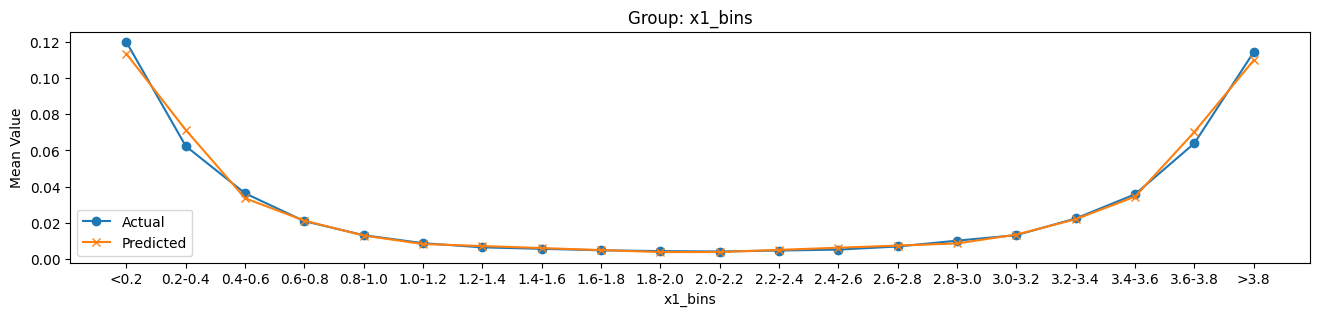

In [25]:
for group in ['x1_bins']:
    plt.figure(figsize=(16, 3))
    summary = df.groupby(group, observed=True).agg({'binary_y': 'mean', 'clf_scipy_pred_prob': 'mean'})
    plt.plot(summary.index, summary['binary_y'], label='Actual', marker='o')
    plt.plot(summary.index, summary['clf_scipy_pred_prob'], label='Predicted', marker='x')
    plt.title(f'Group: {group}')
    plt.xlabel(group)
    plt.ylabel('Mean Value')
    plt.legend()